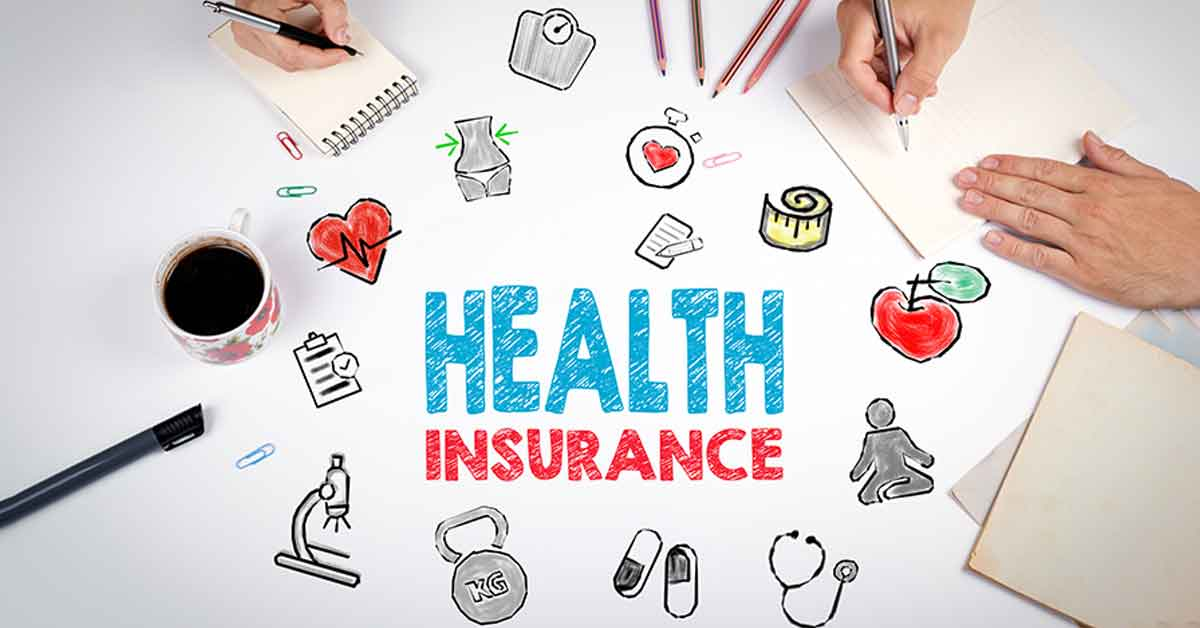

Problem Statement: Predicting Health Insurance Costs

The objective of this project is to develop a predictive model using linear regression to estimate health insurance costs for individuals based on various factors. The dataset used for this analysis contains information about individuals, including their age, sex, BMI (Body Mass Index), number of children, smoking habits, and region.

In [1]:
# import libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 



In [2]:
# read_data
df=pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# to check shape
df.shape

(1338, 7)

In [5]:
df.size

9366

In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# to check datatypes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# correlation 
cr=df.corr()

C:\Users\Pratik\AppData\Local\Temp\ipykernel_7412\3349988681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr=df.corr()


In [9]:
cr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

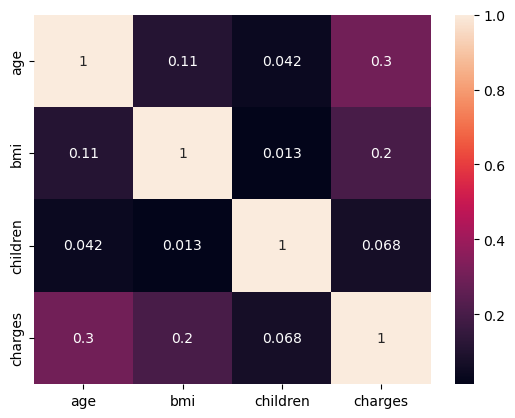

In [10]:
sns.heatmap(cr,annot=True)

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
# to check stas info
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# handling null values 
df.isnull().sum().sum()

0

In [14]:
# handling duplicated values
df.duplicated().sum().sum()

1

In [15]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [16]:
df.shape

(1337, 7)

# visualization 

<Axes: xlabel='age', ylabel='charges'>

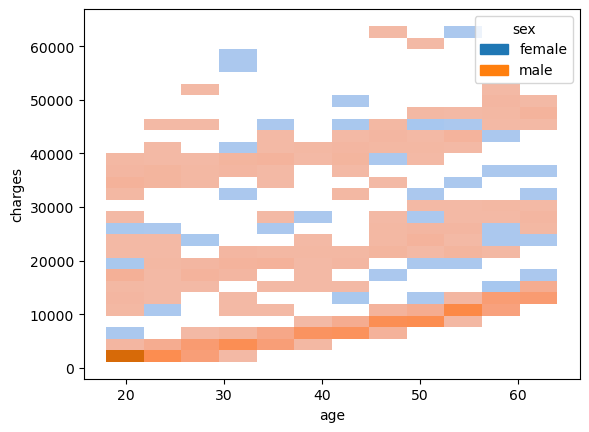

In [17]:
sns.histplot(x='age',y='charges',data=df,hue='sex')

<Axes: xlabel='bmi', ylabel='charges'>

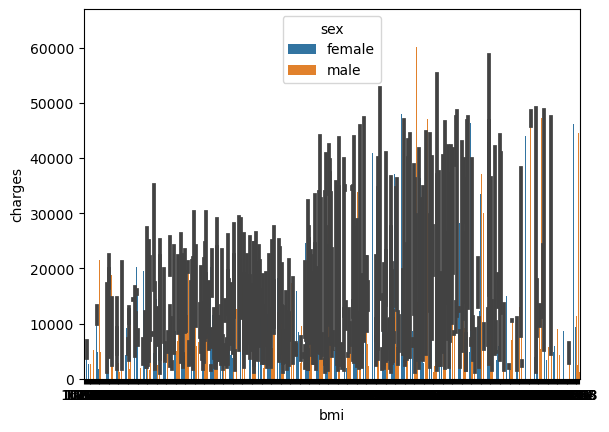

In [18]:
sns.barplot(x='bmi',y='charges',data=df,hue='sex')

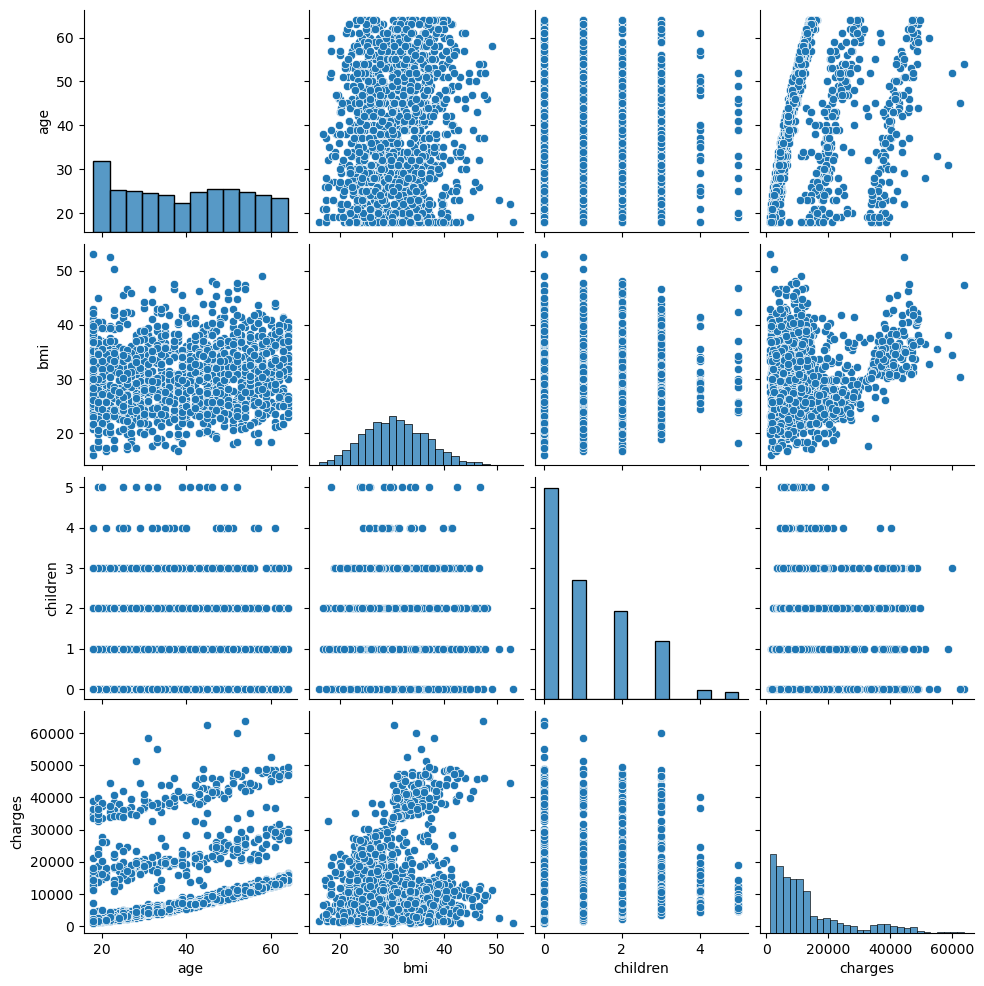

In [19]:
sns.pairplot(df)

In [ ]:
# encoding 
# get_dummies ,onehotencoding , leabelencoding 
# but we use map method 

In [20]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [21]:
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [22]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,northwest,10600.54830
1333,18,0,31.920,0,0,northeast,2205.98080
1334,18,0,36.850,0,0,southeast,1629.83350
1335,21,0,25.800,0,0,southwest,2007.94500


In [23]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
df['region']=df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [25]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,2,10600.54830
1333,18,0,31.920,0,0,3,2205.98080
1334,18,0,36.850,0,0,1,1629.83350
1335,21,0,25.800,0,0,0,2007.94500


In [26]:
# seperate X and y 
X=df.drop('charges',axis=1)

In [27]:
y=df['charges']

In [33]:
# scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(X)

In [35]:
X_sc

array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416,  1.96966039,
        -1.34316271],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162, -0.50770174,
        -0.43801727],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347, -0.50770174,
        -0.43801727],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416, -0.50770174,
        -0.43801727],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416, -0.50770174,
        -1.34316271],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416,  1.96966039,
         0.46712816]])

In [39]:
# cross validation 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=11)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 6)
(268, 6)
(1069,)
(268,)


In [44]:
# moddel training 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
lr.score(X_test,y_test)

0.8140764981210222

In [47]:
# svr 
from sklearn.svm import SVR
svm=SVR()
svm.fit(X_train,y_train)

SVR()

In [48]:
svm.score(X_test,y_test)

-0.042675208415232424

In [53]:
# decison tree 
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [54]:
dt.score(X_test,y_test)

0.6987780814352922

In [63]:
#Random ForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [64]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [65]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=dt.predict(X_test)
y_pred4=rf.predict(X_test)
y_pred5=gb.predict(X_test)


In [66]:
df=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'dt':y_pred3,'rf':y_pred4,'gb':y_pred5})

In [67]:
df

,Actual,lr,svm,dt,rf,gb
1312,36397.576000,28092.188560,9641.600927,36124.57370,36354.016108,35349.307505
1253,4415.158800,5458.794661,9532.329101,4889.03680,4849.325697,6200.037031
372,7639.417450,10849.125756,9595.762809,7650.77375,7391.761100,8297.255950
937,2304.002200,1612.419697,9532.913216,2566.47070,4593.545503,4784.729408
484,9563.029000,12435.739436,9610.522892,8978.18510,10136.833597,9799.187492
...,...,...,...,...,...,...
427,7323.734819,2593.126533,9544.598929,2200.83085,6847.848580,3845.246720
1152,5630.457850,9480.653044,9553.360559,5385.33790,6689.164718,7667.078064
973,2322.621800,5784.830095,9533.556011,2498.41440,3333.339325,4274.640158
608,39241.442000,31858.452734,9662.168850,41949.24410,45005.054234,41928.346098


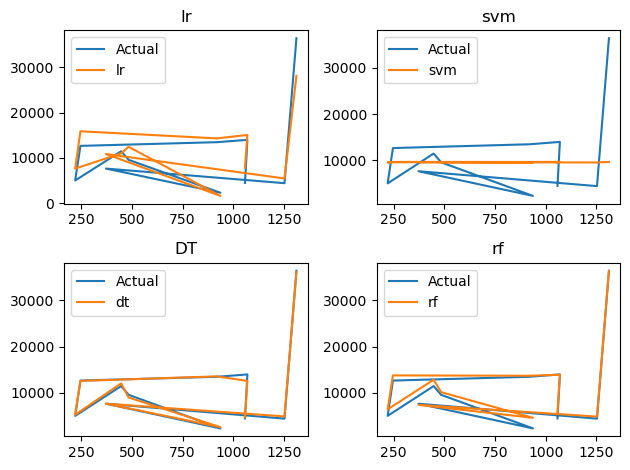

In [84]:
plt.subplot(221)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['lr'].iloc[0:11],label='lr')
plt.title('lr')
plt.legend()

plt.subplot(222)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['svm'].iloc[0:11],label='svm')
plt.title('svm')
plt.legend()


plt.subplot(223)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['dt'].iloc[0:11],label='dt')
plt.title('DT')
plt.legend()


plt.subplot(224)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['rf'].iloc[0:11],label='rf')
plt.title('rf')
plt.legend()




plt.tight_layout()



In [ ]:
# DT is best for this dataset 

# Evaluating the algorithm 

In [69]:

from sklearn.metrics import r2_score ,mean_squared_error,mean_absolute_error

In [ ]:
# now find r2_score 

In [85]:
score1=print(r2_score(y_test,y_pred1))
score2=print(r2_score(y_test,y_pred2))
score3=print(r2_score(y_test,y_pred3))
score4=print(r2_score(y_test,y_pred4))
score5=print(r2_score(y_test,y_pred5))


0.8140764981210222
-0.042675208415232424
0.6987780814352922
0.8867850715265158
0.9120707360877552


In [ ]:
# now find mean squared error 

In [90]:
m1=print(mean_squared_error(y_test,y_pred1))
m2=print(mean_squared_error(y_test,y_pred2))
m3=print(mean_squared_error(y_test,y_pred3))
m4=print(mean_squared_error(y_test,y_pred4))
m5=print(mean_squared_error(y_test,y_pred5))

24375059.121785313
136697456.7125169
39490984.19290555
14842774.297604289
11527757.30198512


In [ ]:
# now find mean absolute error 

In [89]:
s1=print(mean_absolute_error(y_test,y_pred1))
s2=print(mean_absolute_error(y_test,y_pred2))
s3=print(mean_absolute_error(y_test,y_pred3))
s4=print(mean_absolute_error(y_test,y_pred4))
s5=print(mean_absolute_error(y_test,y_pred5))

3639.7393442443336
7745.843040114152
2762.425133242537
2267.3107394187186
2126.001808909794


# Predict charges for new customer 

In [101]:
data={'age':35,'sex':1,'bmi':36.3,'children':4,'smoker':1,'region':2}


In [102]:
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,35,1,36.3,4,1,2


In [103]:
# beacause our dt is best for this data set 

In [104]:
new_pred=dt.predict(df)
print(new_pred)

[43753.33705]


# save model using joblib 

In [105]:
# In earlier step we use only train train and test datset
# We have to train our model on whole dataset => accuracy increase 

In [106]:
dt=DecisionTreeRegressor()
dt.fit(X,y)

DecisionTreeRegressor()

In [107]:
import joblib 

In [108]:
joblib.dump(dt,'model_joblib_dt')

['model_joblib_dt']

In [109]:
model=joblib.load('model_joblib_dt')

In [110]:
model.predict(df)

array([39774.2763])

# GUI 

In [112]:
import joblib 

In [154]:
import tkinter as tk

def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load('model_joblib_dt')
    result = model.predict([[p1, p2, p3, p4, p5, p6]])

    tk.Label(master, text='Insurance Cost').grid(row=7)
    tk.Label(master, text=result).grid(row=8)


# Create a Tkinter window
master = tk.Tk()
master.title('Insurance Cost Prediction')

label = tk.Label(master, text='Insurance Cost Prediction', bg='black', fg='white')
label.grid(row=0, columnspan=2)

tk.Label(master, text='Enter Your Age').grid(row=1)
tk.Label(master, text='Male or Female[1/0]').grid(row=2)
tk.Label(master, text='Enter Your BMI value').grid(row=3)
tk.Label(master, text='Enter No of children').grid(row=4)
tk.Label(master, text='Smoker Yes/No [1/0]').grid(row=5)
tk.Label(master, text='Region [1-4]').grid(row=6)

e1 = tk.Entry(master)
e2 = tk.Entry(master)
e3 = tk.Entry(master)
e4 = tk.Entry(master)
e5 = tk.Entry(master)
e6 = tk.Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

tk.Button(master, text='Predict', command=show_entry).grid(row=7, columnspan=2)

# Start the Tkinter event loop
master.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Pratik\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Pratik\AppData\Local\Temp\ipykernel_7412\2487380643.py", line 4, in show_entry
    p1 = float(e1.get())
ValueError: could not convert string to float: ''


In [158]:
pip install dash

     ---------------------------------------- 10.4/10.4 MB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [157]:
# using pyqt

In [155]:
pip install pyqt5

In [156]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel, QVBoxLayout, QWidget, QPushButton, QLineEdit


class InsuranceCostPredictor(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('Insurance Cost Prediction')
        self.setGeometry(100, 100, 400, 300)

        self.layout = QVBoxLayout()

        self.label = QLabel('Insurance Cost Prediction', self)
        self.label.setStyleSheet("background-color: black; color: white; padding: 10px;")
        self.layout.addWidget(self.label)

        self.input_labels = ['Age', 'Male or Female[1/0]', 'BMI', 'No. of Children', 'Smoker Yes/No [1/0]', 'Region [1-4]']
        self.input_fields = []
        for label in self.input_labels:
            input_label = QLabel(label, self)
            self.layout.addWidget(input_label)

            input_field = QLineEdit(self)
            self.layout.addWidget(input_field)
            self.input_fields.append(input_field)

        self.predict_button = QPushButton('Predict', self)
        self.predict_button.clicked.connect(self.show_result)
        self.layout.addWidget(self.predict_button)

        self.result_label = QLabel('Insurance Cost:', self)
        self.layout.addWidget(self.result_label)

        self.central_widget = QWidget(self)
        self.central_widget.setLayout(self.layout)
        self.setCentralWidget(self.central_widget)

    def show_result(self):
        inputs = [float(input_field.text()) for input_field in self.input_fields]

        # Load and use the trained model for prediction
        model = joblib.load('model_joblib_dt')
        result = model.predict([inputs])

        self.result_label.setText(f'Insurance Cost: {result[0]}')

        
if __name__ == '__main__':
    app = QApplication(sys.argv)
    window = InsuranceCostPredictor()
    window.show()
    sys.exit(app.exec_())


C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


SystemExit: 0

C:\Users\Pratik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
#dash

In [159]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import joblib

app = dash.Dash(__name__)
app.title = 'Insurance Cost Prediction'

app.layout = html.Div([
    html.H1('Insurance Cost Prediction', style={'background-color': 'black', 'color': 'white', 'padding': '10px'}),
    html.Div([
        html.Label('Age'),
        dcc.Input(id='age', type='number', placeholder='Enter your age')
    ]),
    html.Div([
        html.Label('Male or Female [1/0]'),
        dcc.Input(id='gender', type='number', placeholder='Enter 1 for Male, 0 for Female')
    ]),
    html.Div([
        html.Label('BMI'),
        dcc.Input(id='bmi', type='number', placeholder='Enter your BMI')
    ]),
    html.Div([
        html.Label('No. of Children'),
        dcc.Input(id='children', type='number', placeholder='Enter the number of children')
    ]),
    html.Div([
        html.Label('Smoker Yes/No [1/0]'),
        dcc.Input(id='smoker', type='number', placeholder='Enter 1 for Yes, 0 for No')
    ]),
    html.Div([
        html.Label('Region [1-4]'),
        dcc.Input(id='region', type='number', placeholder='Enter your region')
    ]),
    html.Button('Predict', id='predict-button', n_clicks=0),
    html.Div(id='result')
])


@app.callback(
    Output('result', 'children'),
    [Input('predict-button', 'n_clicks')],
    [Input('age', 'value'),
     Input('gender', 'value'),
     Input('bmi', 'value'),
     Input('children', 'value'),
     Input('smoker', 'value'),
     Input('region', 'value')]
)
def predict_insurance_cost(n_clicks, age, gender, bmi, children, smoker, region):
    if n_clicks > 0:
        inputs = [[age, gender, bmi, children, smoker, region]]
        
        # Load and use the trained model for prediction
        model = joblib.load('model_joblib_dt')
        result = model.predict(inputs)

        return f'Insurance Cost: {result[0]}'
    else:
        return ''


if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\Pratik\AppData\Local\Temp\ipykernel_7412\1741858600.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Pratik\AppData\Local\Temp\ipykernel_7412\1741858600.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names

